# Topic 2.1: Linear regression

This notebook combines theory with exercises to support the understanding of linear regression in computer-aided diagnosis. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Linear regression (theory)](#linreg_theory)<br>
2. [Implementing linear regression](#linreg_implementation)<br>
3. [Polynomial regression and model selection](#linreg_polynomials)<br>
4. [k-Nearest neighbor classifier](#knnclassifier)

**References:**<br>

[1] Schneider, Astrid et al. “Linear regression analysis: part 14 of a series on evaluation of scientific publications.” Deutsches Arzteblatt international vol. 107,44 (2010): 776-82. [LINK](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/)

[2] k-Nearest neighbor classifier: [LINK](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4)

<div id='linreg_theory'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 1. Linear regression (theory)

Linear regression is an indispensable tool for statistical analysis and can be considered the most basic building block of neural networks. In its simplest terms, univariate linear regression helps estimate the association between a **continuous** dependent variable (outcome) and an independent explanatory variable (predictor) by fitting a linear equation to observed data. Multivariate linear regression then uses two or more independent variables to predict certain outcome. In medical applications, linear regression allows for the identification of prognostically important risk factors (e.g. weight, blood pressure, etc.).

<center width="100%"><img src="../reader/assets/linear_regression_example.png" width="500"></center>

<font size="1">Figure from [Linear Regression Analysis (Deutsches Ärzteblatt International)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2992018/)</font>

<br>

The equation for linear regression is expressed as $Y = a + bX$, where $X$ is the independent variable and $Y$ is the dependent variable. $b$ denotes the slope of the linear regression line, and $a$ is the intercept ($y$ at $x=0$). 

To graphically visualize linear relationship and its strength between two variables, a scatterplot is commonly used. A fitted regression line (via the least squares method) across all data points then shows either an increasing or decreasing trend. Numerically, the association strength between two variables can be evaluated using the correlation coefficient ($R^{2}$), followed by calculating the $p$-value to determine statistical significance.

After fitting a regression line to a group of data, deviations from the fitted line to the observed values (the so-called *residuals*) allow the observer to inspect the validity of their assumption and accept/reject the hypothesis that a linear relationship exists.

Computed regression lines may be affected by *outliers* (data points lying far away from the main data cluster in the scatterplot). Depending on their position, outliers may have a major impact on the computed trend since these data points may represent erroneous data. The effect of outliers as well as influential observations (horizontally distant points) should be properly investigated and such data potentially removed.

<div id='linreg_implementation'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 2. Implementing linear regression

The optimal parameters of a linear regression model given a training dataset of features **X** and  targets **y** can be obtained with the closed-form solution for minimization of the loss function:

$$
\begin{array}{c}{J(\theta)=\|X \theta-y\|_{2}^{2}} \\ {\nabla_{\theta} J=0} \\ {\theta=\left(X^{\top} X\right)^{-1} X^{\top} y}\end{array}
$$

The function `ls_solve()` that you have implemented in the point-based registration practical (`SECTION 2` of the `registration.py` module) can be reused to solve for the parameters $\theta$.

The `linear_regression()` Python script in `SECTION 1` of the `cad_tests.py` module reads a toy dataset split into training, validation and testing subsets, computes the parameters of a linear regression model and visualizes the results for the training and testing datasets. The toy dataset consists of a single feature and a target variable. For example, the target that we want to predict can be a person's systolic blood pressure and age can be the single feature that describes the person. Such a "small" problem is not often encountered in practice but it can be very illustrative for this technique (in the project work you will work with a more "practical" medical image analysis problem).


The first section of `linear_regression()` loads the training, validation and testing datasets that will be used for training and evaluation of the linear regression model. It also shows a plot of the feature vs. the target variable. We can observe from the plot that the value of the target tends to increase together with the value of the feature.

<center width="100%"><img src="../reader/assets/linreg_training_data.png" width="500"></center>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 2.1*:
What is role of these three subsets in training and evaluating machine learning models?

<font color="red">With the training set you determine the parameters, with the validation set you choose the best model and then the test set is used to identify how well the model is working.</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 2.1*:
Implement the missing functionality of `linear_regression()` that computes the parameters `Theta` of the linear regression model. Note that you will have to add a column of all ones to the data matrix, for which you can use the provided `addones()` function in the `cad_util.py` module.

If you have implemented this correctly, the results for the training set should look like in the figure below. 

<center width="100%"><img src="../reader/assets/linreg_training.png" width="500"></center>


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


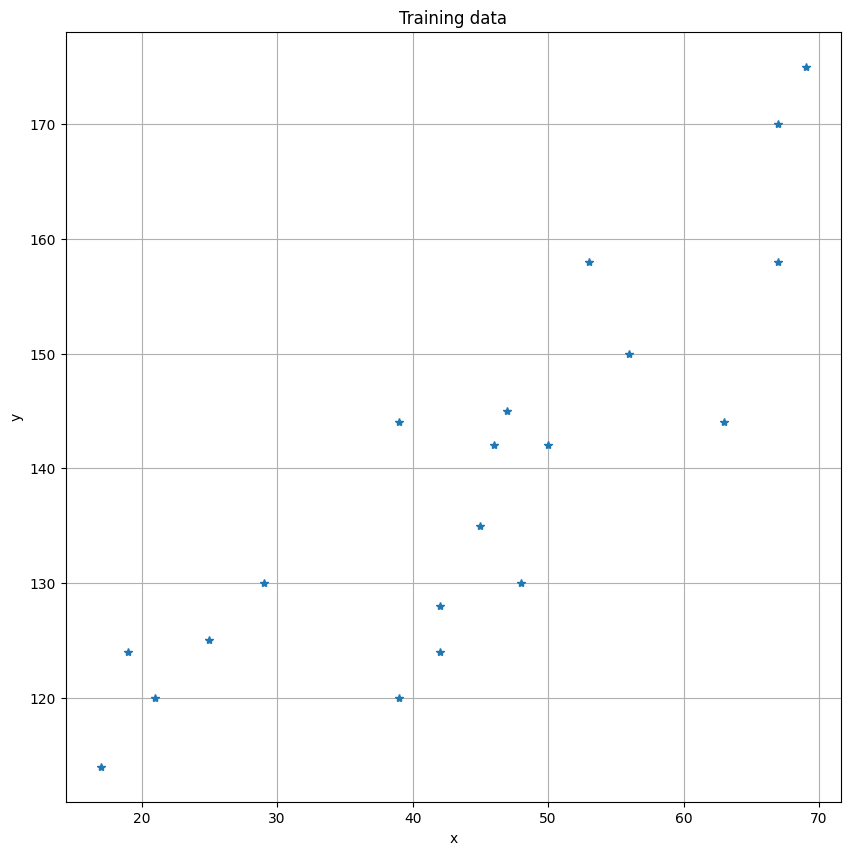

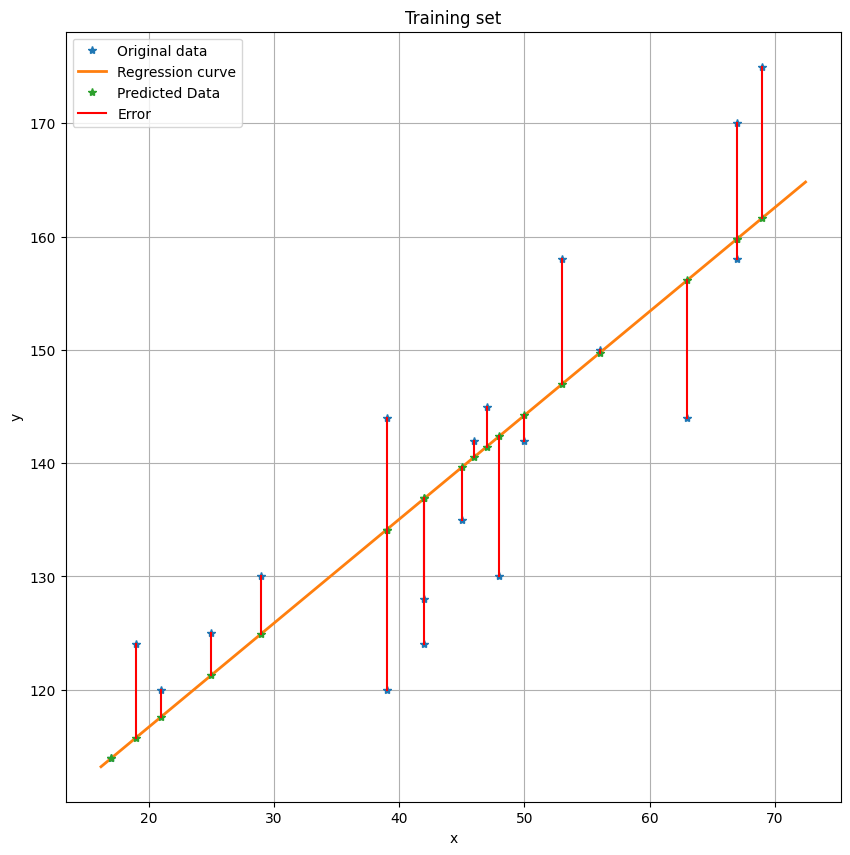

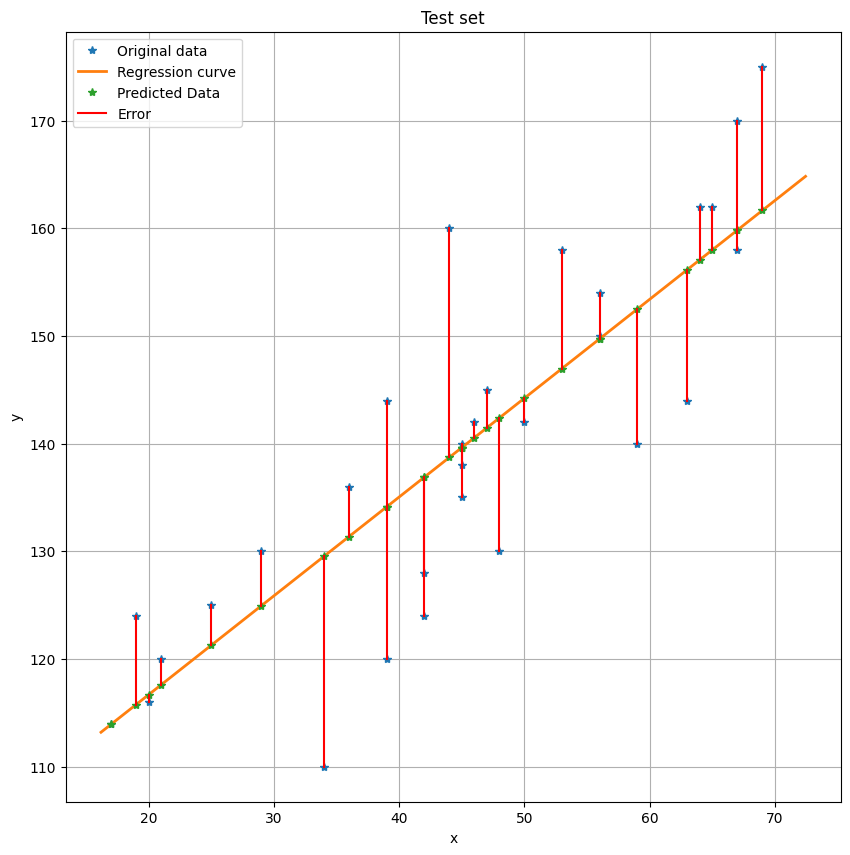

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_tests import linear_regression

E_validation, E_test = linear_regression()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 2.2*:
How can you compute the error of the linear regression model for the optimal parameters? Implement this at the end of `linear_regression()`.

In [2]:
print(E_validation)
print(E_test)

[[1048.55678907]]
[[2469.38653661]]


<div id='linreg_polynomials'></div>

## 3. Polynomial regression and model selection

Suppose that after examining the results from the linear regression model, your conclusion is that a quadratic model might be a better fit for the data. Instead of a line, the fitted model now resembles a parabola, which is described by the equation $y = ax^{2} + bx + c$. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Exercise 3.1*:
Use the existing code for linear regression to implement and evaluate such a model. You can make a copy of `linear_regression()` called `quadratic_regression()` and work there.

If you have implemented this correctly, the results for the training set should look like in the figure below:

<center width="100%"><img src="../reader/assets/quadreg_training.png" width="500"></center>


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[[1041.26149934]]
[[2312.03653573]]


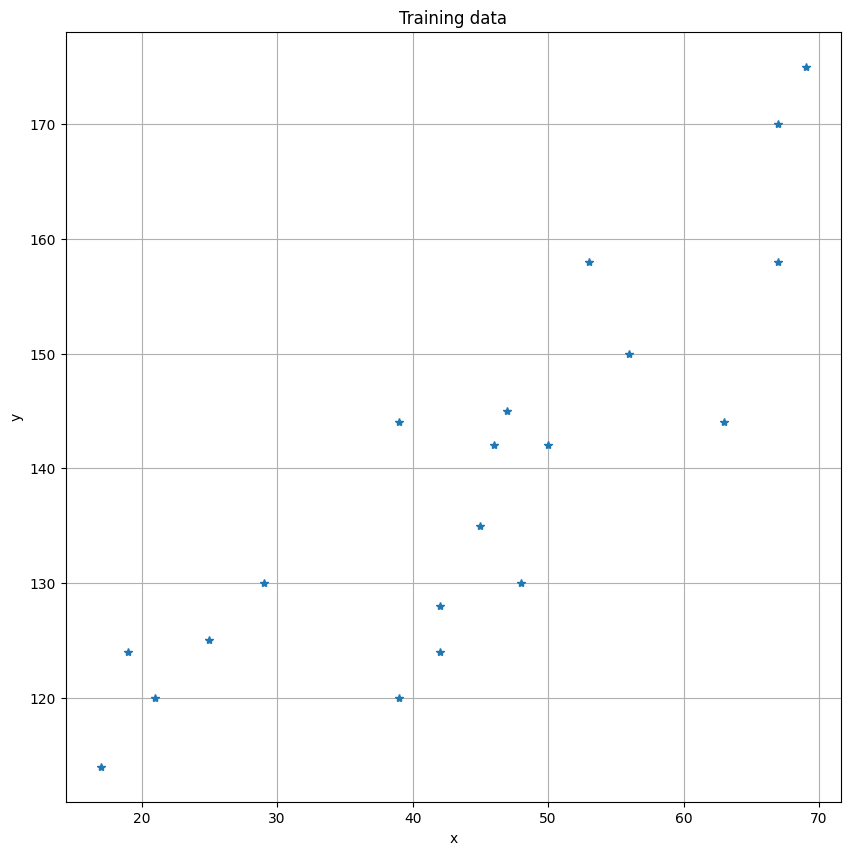

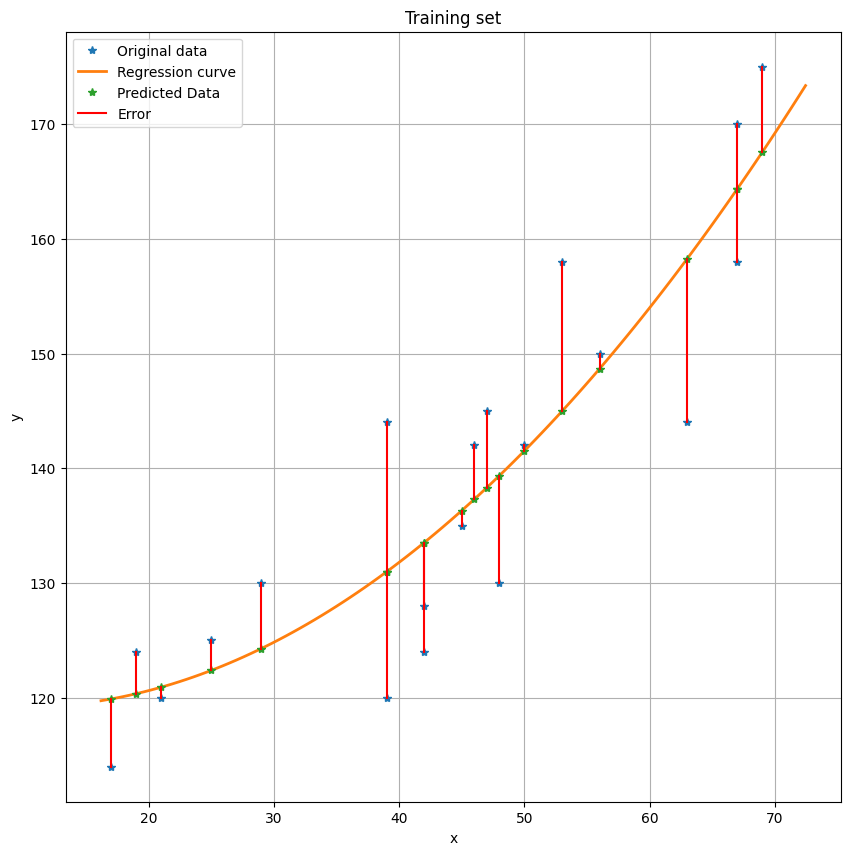

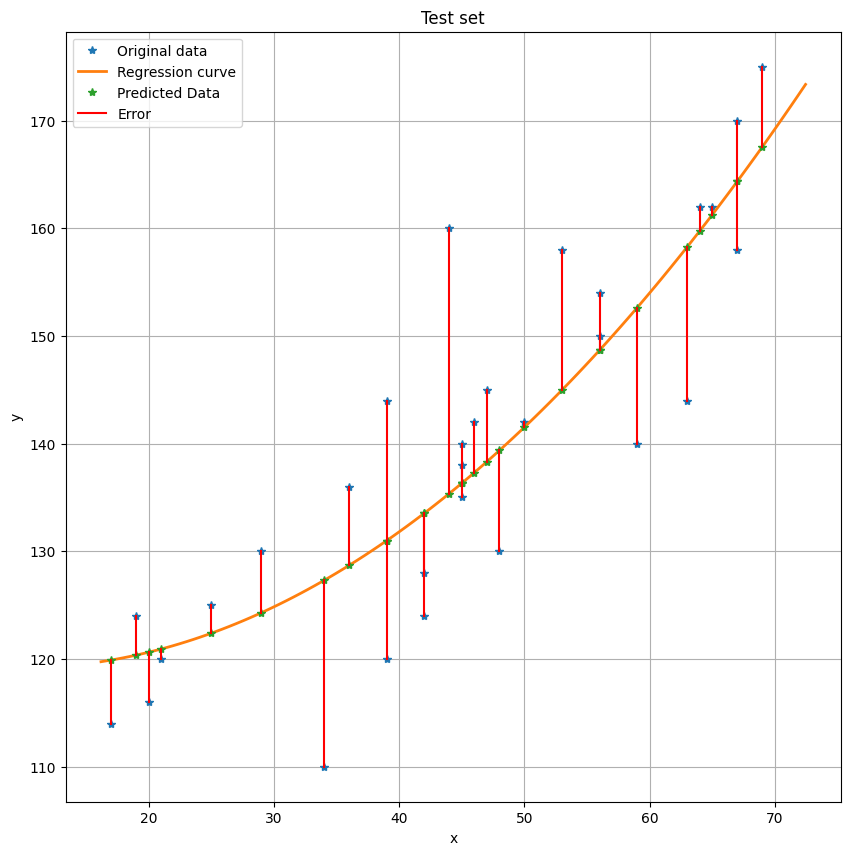

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_tests import quadratic_regression

E_validation, E_test = quadratic_regression()
print(E_validation)
print(E_test)

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.1*:
You now have implemented both linear and quadratic regression. Compare the quadratic regression to the linear regression model. Which model would you choose and why? 

<font color="red">There is barely a difference, the quadratic regression has a lower error so is therefore better.</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 3.2*:
After choosing one of the two models, you have to report the error. For which dataset should you report the error?

<font color="red">For the test dataset since this one is not already used for making the model.</font>

<div id='knnclassifier'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 4. Nearest neighbor classifier

The $k$-Nearest Neighbor is a type of supervised learning algorithm used both in regression and classification tasks (e.g. to classify a CT or MRI scan as benign or malignant based on given features). Given $N$ training vectors, the $k$-NN algorithm tries to predict the class for the test data (e.g. a feature vector $\mathbf{c}$) by calculating the distance between $\mathbf{c}$ and other training points. The variable $k$ represents the selected number of points which is closest to $\mathbf{c}$.

<center width="100%"><img src="../reader/assets/k_nearest_neighbor.png" width="500"></center>

<font size="1">Figure from [Antony Christopher on K-Nearest Neighbor](https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4)</font>

In classification tasks, $k$-NN algorithm is typically used to identify the category or class of a particular data point (or dataset) which is newly added to the space of two known categories, e.g. `A` and `B`. How does the algorithm determine the class or category? For a new example with features $x_{new} = [x_{1},x_{2}]$, predict the class $\hat{y_{new}}$ as follows:

1. Specify the amount of neighbors $k$ (e.g. $5$)
2. Compute the distance from the new point to the $k$ training samples. The most frequently used distance metric is the Euclidean distance calculated as $d(x_{new},x_{i})=\sqrt{(x_{new,1}-x_{i,1})^{2} + (x_{new,2}-x_{i,2})^{2}}$ (Note: another often used metric is [L1-distance](https://iq.opengenus.org/manhattan-distance/))
3. Count the number of data points in each category among the $k$ neighbors according to the Euclidean distance, sort them, and pick the nearest ones
4. Determine the class of the $k$ nearest training samples
5. Assign to $x_{new}$ the majority class of its nearest training samples (neighbors)
6. Algorithm has finished

Now, the question remains how to select the values of $k$. In general, the higher the value of $k$, the lesser the chance of erroneous classification. However, one has to keep in mind that every iteration of the distance calculation is computationally expensive. One cannot select the most applicable $k$-value via any pre-defined statistical methods. If we were to choose the optimal value of $k$ based on the performance on the training set, we would always select $k = 1$ since the training error would be 0. Hence, we need to choose $k$ based on the performance on an independent test set. The test set should be independent in the sense that the examples that it contains should by no means be related to the ones in the training set.